In [4]:
## all imports goes here

import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
!ls

geckodriver.log  general.ipynb


In [6]:
file_name = '../../data/fd-export.csv'

## read file
df = pd.read_csv(file_name)

In [7]:
df.head()

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4


# Initial exploration

In [8]:
## Unique users count
unique_users = df.user_id.unique().shape[0]
print("Unique users: {}".format(unique_users))


## Age range
print(' Age range: Min = {}, Max = {}, Nans = {}'.format(df.age.min(), df.age.max(), df.age.isna().sum()))

## Valid age range entries

print('Valid Age range entries = {}, that is percentaget {}'.format(df[ (df.age>0) & (df.age < 100) ].shape[0],
     df[ (df.age>0) & (df.age < 100) ].shape[0] / (float) (df.shape[0]) ))


## users with invalid ages
invalid_ids = set(df[ (df.age<0) | (df.age > 100) ].user_id.values)

unique_valid_users = df[~df.user_id.isin(invalid_ids)].user_id.unique().shape[0]

print("Valid users with norma age = {}, Percentage {}".format( unique_valid_users, unique_valid_users/
                                                               float( unique_users ) ))

Unique users: 22071
 Age range: Min = -196693.0, Max = 2017.0, Nans = 216662
Valid Age range entries = 3251220, that is percentaget 0.9322139112687602
Valid users with norma age = 22056, Percentage 0.9993203751529156


### The number of user with abnormal age can be removed safely. 
Check the above data to validate the claim

In [9]:
"""
    Function to remove abnormal age.
    This is required for reusability purpose.
    
    @Input : dataframe
    @Return : dataframe
"""
def remove_abnormal_age(df):
    df.age = df.age.fillna(-1)
    invalid_ids = set(df[ (df.age<0) | (df.age > 100) ].user_id.values)
    valid_df = df[~df.user_id.isin(invalid_ids)]
    
    print("Valid users with norma age = {}, Percentage {}".format( valid_df.user_id.unique().shape[0]
                                                                  , valid_df.user_id.unique().shape[0]/
                                                               float( df.user_id.unique().shape[0] ) ))
    
    return valid_df

## filter the user
df_processed = remove_abnormal_age(df)

df_processed.head()
    


Valid users with norma age = 20456, Percentage 0.9268270581305786


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
5,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2


## Explore Sex

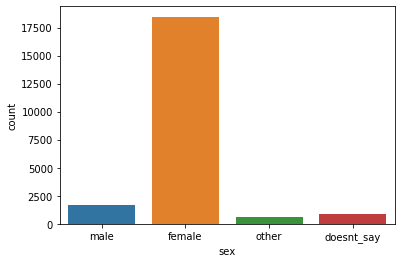

In [10]:
df_fixed = df.drop_duplicates(['user_id'])
sns.countplot(data = df_fixed, x = 'sex')

There is a high imbalance in the gender. We will address this issue later.

# Explore Country

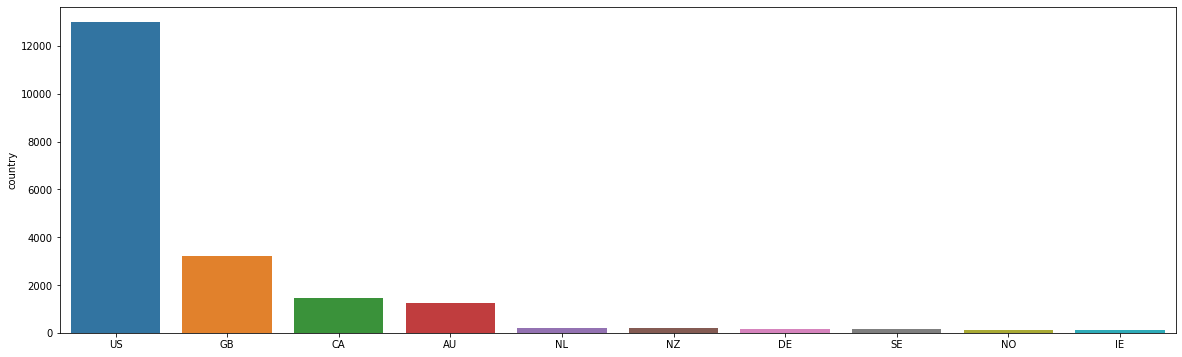

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
df_country = df_fixed['country'].value_counts(ascending = False)

## Top 10 countries.
temp_df = df_fixed['country'].value_counts().sort_values( ascending = False)[:10]
sns_plt = sns.barplot(y = temp_df, x = temp_df.index)


In [12]:
df_processed.country.unique()

array(['US', 'CA', 'GB', 'MO', 'CL', 'NL', 'AU', 'SE', 'ZA', 'IE', 'BE',
       'FI', 'NZ', 'KZ', 'AT', 'PE', 'IN', 'CH', 'PT', 'ES', 'IL', 'DE',
       'SG', 'IS', 'UA', 'HK', 'RU', 'FR', 'AS', 'DK', 'UY', nan, 'MU',
       'DZ', 'PK', 'AR', 'NO', 'AF', 'TH', 'LU', 'SA', 'MV', 'PL', 'UM',
       'MY', 'DO', 'CZ', 'IT', 'CO', 'MA', 'MX', 'PR', 'QA', 'WS', 'RO',
       'LY', 'AE', 'BR', 'HU', 'AG', 'LT', 'IR', 'AD', 'SV', 'JP', 'VN',
       'GR', 'KR', 'CN', 'ME', 'RS', 'AL', 'BY', 'CI', 'SI', 'CR', 'MG',
       'PF', 'PH', 'TZ', 'SK', 'GT', 'AX', 'EE', 'HR', 'VI', 'BH', 'TV',
       'BN', 'AQ', 'BF', 'BS', 'EC', 'LB', 'KE', 'NG', 'PG', 'TR', 'SX',
       'NP', 'BT', 'TT', 'ID', 'UG', 'ZM', 'IM', 'EG', 'CY', 'BD', 'VU',
       'BB', 'GH', 'TW', 'BG', 'LR', 'PA', 'SO', 'HN', 'VE', 'KH', 'IQ',
       'LV', 'SD', 'KW', 'GY', 'MT', 'ET', 'UZ', 'LK', 'JO', 'BM', 'NI',
       'BQ', 'JE', 'JM', 'FK', 'MK', 'CV', 'BA'], dtype=object)

List of the countries

# Trackable types

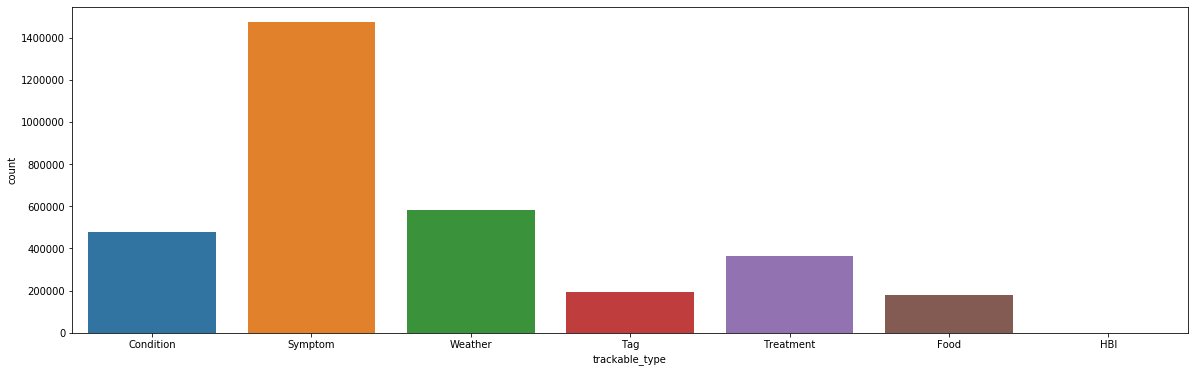

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(data = df_processed, x = 'trackable_type')

# Let's add conditions by id

In [14]:
condition_file = '../../data/conditions_list.csv'
## get the merge condition
def merge_condition_symptoms(df):
    df_conds = df[df.trackable_type == 'Symptom']
    condition_df = pd.read_csv(condition_file)
    df_conds.trackable_id = df_conds.trackable_id.astype('int64') 
    
    df_conds_with_name = pd.merge( df_conds, condition_df , 
                                  on = 'trackable_id', how = 'left' )
    return df_conds_with_name

## df conditions
df_conds = merge_condition_symptoms(df_processed)

df_conds.head(30)
    

/home/shibin/softwares/anaconda2/envs/nlpproject/lib/python3.8/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,Count,Condition,New Name,Family,Group,Pot. Problem,Comments
0,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,123,Symptom,Joint stiffness,3,132.0,Urinary Pain,Urinary problem,Renal-Urinary,Pain,NaN,NaN
1,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-17,245,Symptom,mania,0,25.0,Low energy,Fatigue,Physical,Fatigue,NaN,NaN
2,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-17,54,Symptom,Depression,0,384.0,Bipolar disorder,Bipolar disorder,Neural,Mood,NaN,NaN
3,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-17,246,Symptom,intrusive thoughts,0,71.0,right hip pain,Pain,Physical,Pain,NaN,NaN
4,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-17,197,Symptom,Stomach cramps,2,9.0,High cholesterol,High cholesterol,Physical,Metabolism,NaN,NaN
5,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-17,247,Symptom,ovarian pain,0,31.0,Heart flutters,Heart palpitations,Cardiac,Heart,NaN,NaN
6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-17,56,Symptom,Diarrhea,3,1553.0,Headaches,Headache,Neural,Pain,NaN,NaN
7,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-08-10,54,Symptom,Depression,1,384.0,Bipolar disorder,Bipolar disorder,Neural,Mood,NaN,NaN
8,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-08-10,56,Symptom,Diarrhea,0,1553.0,Headaches,Headache,Neural,Pain,NaN,NaN
9,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-08-10,197,Symptom,Stomach cramps,1,9.0,High cholesterol,High cholesterol,Physical,Metabolism,NaN,NaN


In [15]:
df_processed[df_processed.trackable_type == 'Symptom'][['trackable_id', 'trackable_name' ] ].groupby('trackable_id').head()

,trackable_id,trackable_name
15,123,Joint stiffness
71,245,mania
72,54,Depression
73,246,intrusive thoughts
74,197,Stomach cramps
...,...,...
3487417,14750,memory recall
3487420,12842,word recall
3487422,15404,Forward Planning
3487565,2825,night pain


# Explore Medication

In [16]:
df_processed[df_processed.trackable_type == 'Treatment']

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
201,QEVuQwEA08uRNqb7wltBMKWvJGIUwA==,36.0,female,US,2015-05-26,1470,Treatment,Caffeine,100.0 mg
202,QEVuQwEA08uRNqb7wltBMKWvJGIUwA==,36.0,female,US,2015-05-26,5681,Treatment,Methadone,20.0 mg
203,QEVuQwEA08uRNqb7wltBMKWvJGIUwA==,36.0,female,US,2015-05-26,7404,Treatment,Provigil,56.25 mg
215,QEVuQwEA08uRNqb7wltBMKWvJGIUwA==,36.0,female,US,2015-05-27,1470,Treatment,Caffeine,100.0 mg
216,QEVuQwEA08uRNqb7wltBMKWvJGIUwA==,36.0,female,US,2015-05-27,5681,Treatment,Methadone,10.0 mg
...,...,...,...,...,...,...,...,...,...
3487533,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,869,Treatment,Azithromycin,2 x 250 mg
3487534,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,8988,Treatment,Tramadol,1 dose
3487535,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,24574,Treatment,ultra levure,3x
3487536,QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==,17.0,female,FR,2018-07-12,493,Treatment,Amoxicillin,4x/ 1g


In [17]:

import urllib3
import requests
from bs4 import BeautifulSoup
base_url = "https://www.goodrx.com/"
import os  
from selenium import webdriver  
from selenium.webdriver.chrome.options import Options  
from selenium.webdriver.common.keys import Keys

def get_prices(medicines):
    
    #from selenium import webdriver
    chrome_options = Options()  
    chrome_options.add_argument("--headless") 
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--window-size=1420,1080')
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--disable-gpu')
    chrome_options.binary_location = '/home/shibin/Downloads/chromedriver_linux64'  
    #driver = webdriver.Chrome("/home/shibin/Downloads/chromedriver_linux64/chromedriver", 
    #                          chrome_options = chrome_options 
    #                         )
    driver = webdriver.Firefox('/home/shibin/Downloads')
    price_map = {}
#     headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    for med in medicines:
        med = med.replace(" ", "-").lower()
        print(med)
#         resp = requests.get(base_url + med, headers = headers)
#         resp = driver.get(base_url+med).page_source
        resp = driver.get('https://google.com').page_source
        driver.quit()
        print(resp)
#         parsed = BeautifulSoup(resp, 'html.parser')
        
        ## 
        print(resp.content)
#         val = parsed.find_all( 'div', {'data-qa':"drug_price"})[0].get_text()
#         price_map[med] = val
    
    return price_map

#get_prices(['hydroxyzine-hydrochloride'])
        
        
        

In [18]:
!which python

/home/shibin/softwares/anaconda2/envs/nlpproject/bin/python


In [19]:
!echo $PYTHON

In [20]:
df_processed[df_processed.trackable_type == 'Food']

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
876,QEVuQwEA5hkzTOaPksnHJZZjyHW/Ww==,48.0,female,US,2017-03-16,8838,Food,coffee,NaN
1934,QEVuQwEA39gcq8BrtdzGE9gPIHS2mA==,37.0,female,BE,2017-02-04,8815,Food,chicken,NaN
1935,QEVuQwEA39gcq8BrtdzGE9gPIHS2mA==,37.0,female,BE,2017-02-04,9384,Food,potato chips,NaN
1951,QEVuQwEA39gcq8BrtdzGE9gPIHS2mA==,37.0,female,BE,2017-07-31,8801,Food,pizza,NaN
1952,QEVuQwEA39gcq8BrtdzGE9gPIHS2mA==,37.0,female,BE,2017-07-31,8902,Food,Bread,NaN
...,...,...,...,...,...,...,...,...,...
3487606,QEVuQwEAk8TstQqKvjz8p2J6FAqOcA==,24.0,male,GB,2018-07-12,8935,Food,water,NaN
3487607,QEVuQwEAk8TstQqKvjz8p2J6FAqOcA==,24.0,male,GB,2018-07-12,9153,Food,crisps,NaN
3487608,QEVuQwEAk8TstQqKvjz8p2J6FAqOcA==,24.0,male,GB,2018-07-12,12296,Food,jelly,NaN
3487609,QEVuQwEAk8TstQqKvjz8p2J6FAqOcA==,24.0,male,GB,2018-07-12,24872,Food,burgers,NaN


In [21]:
df_processed[df_processed.trackable_id == 2200]

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
773257,QEVuQwEAez8ZGkuELE7Lo1QkOXokoQ==,45.0,female,US,2017-07-30,2200,Condition,Double Vision,0
1060139,QEVuQwEATIns+IO7vj8KIoY9JHIf2w==,1.0,female,AU,2017-10-08,2200,Condition,Double Vision,3
3397566,QEVuQwEAm5iVheozdHzmXIeGFBcDMQ==,23.0,doesnt_say,GB,2018-07-03,2200,Condition,Double Vision,3


In [22]:
df_processed.nunique()

user_id             20456
age                    84
sex                     4
country               138
checkin_date         1164
trackable_id       114833
trackable_type          7
trackable_name      59079
trackable_value      8404
dtype: int64

In [23]:
print(df_processed[ df_processed.trackable_type =='Symptom'].shape[0])
print(df_processed[ df_processed.trackable_type =='Condition'].shape[0])
print(df_processed[ df_processed.trackable_type =='Condition'].trackable_id.value_counts())
df_processed[ df_processed.trackable_type =='Symptom'].nunique()

1472279
476306
397     20536
291     17881
64      15245
220      9223
649      8733
        ...  
5674        1
3749        1
3578        1
8173        1
7555        1
Name: trackable_id, Length: 6036, dtype: int64


user_id            17536
age                   81
sex                    4
country              129
checkin_date        1158
trackable_id       13005
trackable_type         1
trackable_name     10757
trackable_value        5
dtype: int64

In [24]:
cnt = 0 
import re
uniques = df_processed[ df_processed.trackable_type =='Symptom'].trackable_name.unique()
uniques = set( [ re.sub(r"[^a-z ]", "", x.lower().strip() )for x in uniques ] )
print(len(uniques))
for sym in np.sort(list(uniques)):
    print(sym.lower())
    cnt += 1
    if(cnt == 100):
        break
    

10568

  
   
    
     
        
 anxiety 
 arm weakness
 brain fog 
 chest pain 
 dissociation 
 dizziness 
 ear pressure 
 episode
 fatigue 
 fever
 hand weakness
 head pressure 
 lacking motivation 
 leg weakness 
 light sensitivity 
 needing wet wipes
 pain
 period pain
 poor appetite 
 poor balance 
 short breath 
 spacing out 
 steps managed
 stools 
 stools  range eg  
 temperature
 tender points
 urgencies 
 zoning out 
a
abd
abd bloatingpressure
abdo
abdom
abdomanal pain
abdomen pain
abdominal
abdominal ache
abdominal adhesion sensitivity
abdominal bloat
abdominal bloating
abdominal burning
abdominal cramping
abdominal cramps
abdominal discomfort
abdominal distension
abdominal muscle
abdominal muscle cramps
abdominal muscle pain
abdominal muscle tightness
abdominal myofascial pain
abdominal noise
abdominal numbness
abdominal or pelvic pain
abdominal pain
abdominal pain  general ache
abdominal pain  stabbing
abdominal pain  upper left quadrant
abdominal pain left side
abdomina

In [25]:

"""
    Filter disease with enough data
"""
def filter_conditions(df, min_n):
    ## filter frame
    df_fil = df_processed[ df_processed.trackable_type =='Condition'].trackable_id.value_counts().sort_values( ascending = False)
    valid_list = []
    
    for index, value in zip(df_fil.index, df_fil):
        if value < min_n:
            break
        else:
            valid_list.append(index)
            
    return valid_list
            
        
    
    
print(filter_conditions(df_processed, 500))

['397', '291', '64', '220', '649', '1146', 397, '350', '358', 291, '561', '80', 220, '1164', 64, '463', '423', '1131', '1174', '1132', '1201', '1153', '269', '36', 649, '616', '1191', '886', '218', 358, '614', '549', '1708', 1069, '99', '799', '411', 80, '76', '1069', '1199', '529', 350, '697', '942', 1164, '421', '551', 561, '1183', '810', '2', 423, '1165', 1146, '1186', '121', '187', '1276', 529, '1006', '532', '1150', '848', '728', 36, 1199, '93', '3698', '459', '849', 1132, '956', '1278', '677', '1264', '1218', '1411', '56', '866', '1233', '876', 1201, '318', '1134', '1126', 886, '650', 463, '263', 421, 549, '1032', '1194', 1150, '245', '1154', 459, '944', '582', '137', 1194, '1128', '1305', 1131, '1493', 411, '1136', 199, '1367', '309', '692', '717', 1174, 1153, '1587', 1411, '914', '2446', '227', '745', '1358', 1385, 1191, 614, 810, '10', '1137', 745, '488', '299', 2, '493', '1488', '216', '1147', 187, '1158', '1312', '1536', '1163', '911', '636', '1345', '256', 1367, 1239, 137, 

In [26]:
## User with multiple conditions

(df_processed[df_processed.trackable_type =='Condition'][ ['user_id','trackable_id'] ]).groupby('user_id').apply(lambda x: ','.join(x)).reset_index()

,user_id,0
0,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,"user_id,trackable_id"
1,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,"user_id,trackable_id"
2,QEVuQwEA+0Esxl3ELrRMvIDrYSCjcg==,"user_id,trackable_id"
3,QEVuQwEA+0accgewN6d+/Xtgc4lolw==,"user_id,trackable_id"
4,QEVuQwEA+0sm2RKcOqglngA1xWXYXg==,"user_id,trackable_id"
...,...,...
18670,QEVuQwEAzy/GjKfVjK5w9RE8r9GKSA==,"user_id,trackable_id"
18671,QEVuQwEAzye6f09ESt+fSX2dSfbQCw==,"user_id,trackable_id"
18672,QEVuQwEAzz8xpkZ9bbuS/YqImpnEmw==,"user_id,trackable_id"
18673,QEVuQwEAzzQMkWPPFcKbdsHF0NWVAw==,"user_id,trackable_id"


In [27]:
((df_processed[df_processed.trackable_type =='Condition'])[ ['user_id','trackable_id'] ]).groupby('user_id', as_index = False).agg(lambda x:  ','.join(x))

,user_id,trackable_id
0,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,"user_id,trackable_id"
1,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,"user_id,trackable_id"
2,QEVuQwEA+0Esxl3ELrRMvIDrYSCjcg==,"user_id,trackable_id"
3,QEVuQwEA+0accgewN6d+/Xtgc4lolw==,"user_id,trackable_id"
4,QEVuQwEA+0sm2RKcOqglngA1xWXYXg==,"user_id,trackable_id"
...,...,...
18670,QEVuQwEAzy/GjKfVjK5w9RE8r9GKSA==,"user_id,trackable_id"
18671,QEVuQwEAzye6f09ESt+fSX2dSfbQCw==,"user_id,trackable_id"
18672,QEVuQwEAzz8xpkZ9bbuS/YqImpnEmw==,"user_id,trackable_id"
18673,QEVuQwEAzzQMkWPPFcKbdsHF0NWVAw==,"user_id,trackable_id"


In [28]:
def find_multi_conditions(df):
    df = df[df.trackable_type == 'Condition'][ ['user_id', 'trackable_id' ] ]
    result  = {}
    for index,row in df.iterrows():
        #print(row)
        if( not row['user_id'] in result):
            result[row['user_id']] = set()
        result[row['user_id']].add(row['trackable_id'])
        
    for key, val in result.items():
        if( len(val) > 1):
            print(key)
            
find_multi_conditions(df_processed)

QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==
QEVuQwEAt9BT8darNBUVXse2TEL3SA==
QEVuQwEAkEzdSCGIT4aSMUGksMXjug==
QEVuQwEA08uRNqb7wltBMKWvJGIUwA==
QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==
QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==
QEVuQwEAT556zzFRIWMYQwW/SuVuQg==
QEVuQwEAySNc94wq/U0XyceMt4mQvA==
QEVuQwEAS6XPkxT/mGvdKNWLmtXgGg==
QEVuQwEA4k59STKRNCNa02V6JOoQuA==
QEVuQwEAITdV7qg+AKliR3aWQEBtlw==
QEVuQwEAookfJXqVy92WEQWogzQJRw==
QEVuQwEAdmwUDJyS5M+dwYUKpgyRLw==
QEVuQwEA6sKXgUQ0sfNrIXq9lXiWTA==
QEVuQwEAAAbpzYoNL0B1I+V9PJFLlw==
QEVuQwEAOoe+J0WHdCGGvv3bzIdwFA==
QEVuQwEAIODovc1iRDq9+gpABk/+Ig==
QEVuQwEAUIElK91m0E3Vz5psbWFdTQ==
QEVuQwEALfqfVnVYBcE/fcwJ29T/mw==
QEVuQwEAr0mbYbr5o5yEOHRkWadnTQ==
QEVuQwEAgj80L9DxmY0oL8iu46pLFg==
QEVuQwEArzxRaycTgh5Yz70QaiF+Cw==
QEVuQwEA5hkzTOaPksnHJZZjyHW/Ww==
QEVuQwEAuOzw6jZyZGBnIqrkh5iJwg==
QEVuQwEABHIqeasMvY8+o3YIhBXq9Q==
QEVuQwEAwa3ZwxtZDwgWFqf4VRI5Cg==
QEVuQwEAk/rSbJXDTCv24FNYvt8GGA==
QEVuQwEA7fEmexqerAXnHQ2Ov9dlwQ==
QEVuQwEAP3ZV1JmShtZMVVe8j5/PaA==
QEVuQwEAFxXz9Tt1cEAOuNfDbEiY8Q==
QEVuQwEAQA

QEVuQwEAZ1xqsnybK4t336KXMdhM7w==
QEVuQwEAwc+zKhyDDUZaX49VTJBkMA==
QEVuQwEAsyjPe3kVyCHY1SHEDhSdlw==
QEVuQwEA8uR8E3wEN5vxHd5jer9Ulw==
QEVuQwEAjvKR2/GzXw0QLvP+84H5mg==
QEVuQwEAwQw/Yb3y68CLx8mDjJ+4BA==
QEVuQwEAHGex31CDWM0mUAAlmz5NVA==
QEVuQwEAhyZklm//2hejyQ16Bmoceg==
QEVuQwEAIVr6aZH9JqoHM19Gk0hW2Q==
QEVuQwEA7kLijDE+pNQQTjaCjR8MAQ==
QEVuQwEANzMBWsBDTJwqr/aHYUAvaA==
QEVuQwEAkNo3GSk8AaCFIN07sBlitw==
QEVuQwEA1voIVa/jmY7YkF596AX4GA==
QEVuQwEAsi41yFMuuqyeJYrWULI3Pw==
QEVuQwEAq6hVNruJlpKbYLs2i5tlIw==
QEVuQwEASmO3bo6QsgFHKDiYK8kH0Q==
QEVuQwEAJUffVHQmvKSzatPkDcmNvQ==
QEVuQwEAcAAgcHTAPL0L9mC2ShAxdw==
QEVuQwEA9+E4LALlOlcOHjyPrj66Rw==
QEVuQwEAodvaBzRZJq3Zmkhh8kBEKA==
QEVuQwEAnEEp2R/qL7kPq3MEQ5d3Gw==
QEVuQwEA2yeltbDt8cCr/hke+U/JYA==
QEVuQwEAoWEAWox++Ucqj3E2UxO9Nw==
QEVuQwEADzygKXr25ufdS8Am58HW7A==
QEVuQwEAX6I/7hqNw2qTpOgeoP1y1w==
QEVuQwEAYeWsa4EtNPQRGsXGB5X2IA==
QEVuQwEA4WF6+SKBSypZo1knLqpuZQ==
QEVuQwEA1w30PUyTtrcYcwzGf2ZK4Q==
QEVuQwEAIUV8SrAmmDsYtKZRgmdLAw==
QEVuQwEA34RqGsm6a8yF9e5nyF7ezg==
QEVuQwEAXx

QEVuQwEAGHdP13V4cmraGKCh7RcuRw==
QEVuQwEAxl3Q4MlNfEUJ9oghsgV4CA==
QEVuQwEA/OkgSfdyVCGCPvy6v4vybQ==
QEVuQwEA6/HkC8ukdu+wcNSl46WCSQ==
QEVuQwEAiuK9BOTc3kj/ml86ptYBtA==
QEVuQwEAeb+3nmqGziBcofcbF9jnIw==
QEVuQwEAQTuDsSQrOo/ImDxHdAlwKg==
QEVuQwEAN0KxYQYuB0cJdAPMca2vQg==
QEVuQwEAgd4Whh5l4g2XMmnv/KoaeQ==
QEVuQwEAJjUPySKcLrGTenqcQopslQ==
QEVuQwEA1KYKclJQppNkWyLB2Qjw1A==
QEVuQwEA2/z1fZ3hXoCoRWZd+LMDHA==
QEVuQwEA+yFJzxWkWkINOAvLddXmsA==
QEVuQwEANU8/YsagjQKwNpEfuNaZpQ==
QEVuQwEAxZFXel99ACxGH26jhKeCug==
QEVuQwEA29UspNOSkZnOrgec3dNkCw==
QEVuQwEAEykm6PNMNOFK7zWzkBnkHA==
QEVuQwEAHCvbSfP4NylPAeifdSikKA==
QEVuQwEAtsQq3J0WdSUVVdyRPlIvDA==
QEVuQwEA2wp4clyxDLTW1V8X0XpK8w==
QEVuQwEAtNXG0QPWoFFARcKLs9Acqg==
QEVuQwEAB0x32uLjH1k1yF1N41DbeQ==
QEVuQwEA0rnCcgpOWbbX7VMBXUixLg==
QEVuQwEA0r5ulnhzKnNnBZ86bdoKSA==
QEVuQwEA8wf1iloo+yGm05VQ3P6PYQ==
QEVuQwEAWZXPq2M0wZnvqwRapKypKw==
QEVuQwEAgCG1LaBKXC4/otTtZemXBQ==
QEVuQwEAJP/vvmKMap9UjCXxucRq7g==
QEVuQwEARQ0tP4afac+M0Xb9xdsP0g==
QEVuQwEA0vC2lvrJzyVEW+Gk4KlZ/A==
QEVuQwEAvi

QEVuQwEAGtyVY/TzRdMs/aaXWR6hqw==
QEVuQwEAYRheMGMfoHzDNHIGRr2WwQ==
QEVuQwEA2EfglRfJ9zV9hFfKhwGT7Q==
QEVuQwEAjkzW6wc8+AxD5VhQxSVp/g==
QEVuQwEASLe2c1KRhnRE3gJpnC2hHA==
QEVuQwEAzjxnTvB4m3hFzi64ZlBS7w==
QEVuQwEA87T/3t9ql5iKtbshBBSyqQ==
QEVuQwEAoXU4HrgItnhsGh8yDh3qwQ==
QEVuQwEAWGwn9g7tWIe5DIbS2NX2qQ==
QEVuQwEARbcEcPeZod5jQu4MaaVZiw==
QEVuQwEAQ+Sums3yNYXlFuFcBCMfRA==
QEVuQwEAhXzJnTBYkbF3P7L+ztXeRg==
QEVuQwEANg/Zs7vZvPvwN532o2tuCg==
QEVuQwEAafWinmBi5WkFw5OV37fhmQ==
QEVuQwEAPZY2y9dzotGY6xAea4R87w==
QEVuQwEA51vfPpmHcsn0pU5JpEHNBQ==
QEVuQwEAa8+iDOmmkP5xze/czKC90g==
QEVuQwEAqtTxkMNv3m3pLqDAZFUBdw==
QEVuQwEAXT77IbKvpb9zCUVwFRK9ig==
QEVuQwEAWxowV4IEu7n78Y+HZeWURw==
QEVuQwEA6t7Aqzb7Ml3CsC8VHoyG+w==
QEVuQwEAWWxJFnV7gxFbD6/1HkdxOw==
QEVuQwEAkBUFE4seyt+Z2twYM27Qbw==
QEVuQwEAM5iwD6ZR83y6XGVPAQi/jw==
QEVuQwEAHPHA4Nc5qTKoL8yCjR2TLw==
QEVuQwEAxFxSpAkiI1i2RiOcA2zPfA==
QEVuQwEAyoTUw8mVO3tbDNCzaaPlUg==
QEVuQwEAbGrDk6tjsetcCRBh3YFzuA==
QEVuQwEAQEKhli29msWFqrYl1ZlD+Q==
QEVuQwEABBXRw4AJr29KdtChR7TAOA==
QEVuQwEAE0

QEVuQwEAeTydwLQ6VcpoI8dbb6bBlA==
QEVuQwEAa1Y2KzOvdS7TS1zYqyqOiQ==
QEVuQwEAw8Q92FkJbc5GsH0Wfy4sjg==
QEVuQwEAk+3+mbT+WEbBhWI0P/Ua2Q==
QEVuQwEArev9NpQeFcPl+WNyk9LmJg==
QEVuQwEAMj+rYx1htyRvzjgMdn92sw==
QEVuQwEAzaTto9L987+loINvfYy5Ew==
QEVuQwEA6BkE0K5wrdfgOJjDMdZfYw==
QEVuQwEAVX9GRLDvRQTBB5ZJpPoIAw==
QEVuQwEAv9jCu7V2LjF6ovhZveAqyg==
QEVuQwEAehpNkGuGcDUX1Ro3CnEFSA==
QEVuQwEAup5v8aLLWWnlqyFjjWMy8A==
QEVuQwEAChYbOeHnf+Lb2Dot1/rm5g==
QEVuQwEA0tklK2XQnS/8413h6b+xJw==
QEVuQwEAmDsujIRTpEtCcbj6O0j19g==
QEVuQwEADn9ZdDKNymu3wnsc/5XB7w==
QEVuQwEAeZWnrtmp/m3t7ms9yZ4oTw==
QEVuQwEATHaFXqBiUNK9NiBXUdun2A==
QEVuQwEA9qUsiYfTuw304tkGwDFhFQ==
QEVuQwEALs6y3MmxId4n9/vMpOI1hQ==
QEVuQwEAXOGozzbXKa5TpoXuyvA1dg==
QEVuQwEAS3HD1Xv80Ckqz3Ngy2bNJQ==
QEVuQwEAhKGC2Fs2qGG640JO/VW28w==
QEVuQwEALeu2q41aBF7YvIk4hOvtpQ==
QEVuQwEALipaAt0IbkbabjyUjoinCw==
QEVuQwEAXeZ1/XolsnsaDCDqJey+DQ==
QEVuQwEAMF4q9/VEmwEgA9ft9pVkgQ==
QEVuQwEAbpF5VDiwCB0JmD1CqZi+7g==
QEVuQwEAN0GZi84w4c9jM41hTto7hA==
QEVuQwEAunR/20gHvDi5g9QET44uog==
QEVuQwEAgz